# numpy 배열
### astype 형 변환, type, shape 확인 등
### 다양한 numpy 생성 함수
### numpy 배열 산술 연산: 동일한 배열 간 연산은 원소 단위, 그렇지 않은 경우 브로드캐스팅의 원리
### 인덱싱: 쉼표로 호출할 때 축 따라 호출
### 행렬 전치, 곱
### 난수 생성 < 중간 정도 중요.. 애매함
### universal 함수 활용해서 문제 해결
- numpy 배열을 이런 식으로 변경해라!! < 이런 문제에 사용될 예정
### Random Walk 예시(작년 중간고사) < 열심히 보기
- sum, any, all

## Universal 함수

1. [3, 6, 0.7, np.NaN, np.inf] 배열을 생성한 뒤,

각 원소가 NaN인지 아닌지 불리안 배열을 반환하자

각 원소가 inf인지 아닌지 불리안 배열을 반환하자

원래 배열의 NaN이나 inf인 원소가 있다면 0으로 바꾸자

In [20]:
import numpy as np
a = np.array([3, 6, 0.7, np.nan, np.inf])

In [21]:
np.isnan(a)
np.isinf(a)
a[np.isinf(a) | np.isnan(a)] = 0

In [22]:
a

array([3. , 6. , 0.7, 0. , 0. ])

2. [np.pi, np.pi/2, np.pi/3] 배열을 생성한 뒤

각 원소의 cos, sin 값을 새로운 배열 C,S 로 생성하여 반환하자

out옵션을 써서, cos값과 sin 값 중에 더 큰 값으로 기존 배열 A에 할당하고
반환하자

In [23]:
b = np.array([np.pi, np.pi/2, np.pi/3])

In [24]:
c = np.cos(b)
c

array([-1.000000e+00,  6.123234e-17,  5.000000e-01])

In [25]:
s = np.sin(b)
s

array([1.22464680e-16, 1.00000000e+00, 8.66025404e-01])

In [26]:
np.maximum(c, s, out=b)

array([1.22464680e-16, 1.00000000e+00, 8.66025404e-01])

np.where 함수 많이 사용됨
- 조건부 표현 가능
- 다른 배열에 기반해 새로운 배열 생성하기 위해 주로 사용

In [27]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [28]:
# cond가 True면 x, False이면 y
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

In [29]:
rng = np.random.default_rng(seed=12345)
arr = rng.standard_normal((4, 4))
c = arr > 0
c

array([[False,  True, False, False],
       [False, False, False,  True],
       [ True, False,  True,  True],
       [False,  True, False, False]])

In [30]:
# True이면 두번째 인수, False이면 세번째 인수
np.where(c, 2, -2)

array([[-2,  2, -2, -2],
       [-2, -2, -2,  2],
       [ 2, -2,  2,  2],
       [-2,  2, -2, -2]])

In [31]:
np.where(c, 2, arr)

array([[-1.42382504,  2.        , -0.87066174, -0.25917323],
       [-0.07534331, -0.74088465, -1.3677927 ,  2.        ],
       [ 2.        , -1.95286306,  2.        ,  2.        ],
       [-0.75938718,  2.        , -0.46695317, -0.06068952]])

## 수학 메소드/통계 메소드

In [32]:
arr = rng.standard_normal((5, 4))
arr

array([[ 0.78884434, -1.25666813,  0.57585751,  1.39897899],
       [ 1.32229806, -0.29969852,  0.90291934, -1.62158273],
       [-0.15818926,  0.44948393, -1.34360107, -0.08168759],
       [ 1.72473993,  2.61815943,  0.77736134,  0.8286332 ],
       [-0.95898831, -1.20938829, -1.41229201,  0.54154683]])

In [33]:
np.mean(arr)

np.float64(0.17933634979615845)

### 축 지정 가능

In [34]:
arr.mean(axis=1)    # 1번 축을 따라 평균 계산

array([ 0.37675318,  0.07598404, -0.2834985 ,  1.48722347, -0.75978045])

In [35]:
arr.mean(axis=0)    # 0번 축을 따라 평균 계산

array([ 0.54374095,  0.06037768, -0.09995098,  0.21317774])

In [36]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()    # arr 원소의 누적합 계산

array([ 0,  1,  3,  6, 10, 15, 21, 28])

[3,6,0.7,np.NaN,np.inf] 배열을 생성한 뒤,

NaN이나 inf인 원소가 있다면 해당 원소들을 나머지 원소들의 평균으로 바꾸자

In [37]:
a = np.array([3, 6, 0.7, np.nan, np.inf])

In [38]:
# np.where 없이 해결, NaN, inf인 원소를 not(~)을 이용하여 나머지 원소들의 평균을 구해 값 변경
a[np.isnan(a) | np.isinf(a)] = np.mean(a[~(np.isnan(a) | np.isinf(a))])

In [39]:
# np.where 이용하여 해결, NaN이나 inf이면 나머지 원소들의 평균을 구해 대입, 아니면 a 원소 그대로 놔둠
a = np.where(np.isnan(a) | np.isinf(a), np.mean(a[~(np.isnan(a) | np.isinf(a))]), a)
a

array([3.        , 6.        , 0.7       , 3.23333333, 3.23333333])

## 불리언 배열 메서드

In [40]:
arr = rng.standard_normal(100)
arr > 0

array([ True, False, False,  True,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False, False,  True, False,
        True, False, False,  True, False,  True, False, False, False,
        True,  True, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True, False, False,
       False])

In [41]:
(arr > 0).sum()

np.int64(51)

In [42]:
(arr <= 0).sum()

np.int64(49)

## 정렬

In [43]:
arr = rng.standard_normal(6)
arr

array([ 0.28208603, -0.62361213,  1.12182226,  0.84122103, -0.7758961 ,
        0.41071644])

In [44]:
arr.sort()

In [45]:
arr

array([-0.7758961 , -0.62361213,  0.28208603,  0.41071644,  0.84122103,
        1.12182226])

In [46]:
arr = rng.standard_normal((5,3))
arr

array([[-2.7224161 , -0.6733048 ,  1.24622153],
       [ 0.79020803,  0.17534089, -0.0292946 ],
       [-1.41951426, -1.35996632,  0.22341156],
       [ 1.76177943, -2.17088985,  0.62848817],
       [ 0.60119653,  0.95075786, -0.86924667]])

In [47]:
arr.sort(axis=0)
arr

array([[-2.7224161 , -2.17088985, -0.86924667],
       [-1.41951426, -1.35996632, -0.0292946 ],
       [ 0.60119653, -0.6733048 ,  0.22341156],
       [ 0.79020803,  0.17534089,  0.62848817],
       [ 1.76177943,  0.95075786,  1.24622153]])

In [48]:
arr.sort(axis=1)
arr

array([[-2.7224161 , -2.17088985, -0.86924667],
       [-1.41951426, -1.35996632, -0.0292946 ],
       [-0.6733048 ,  0.22341156,  0.60119653],
       [ 0.17534089,  0.62848817,  0.79020803],
       [ 0.95075786,  1.24622153,  1.76177943]])

## Random Walk
매 반복 동안 0.5의 같은 확률로 +1, -1을 결정

0부터 시작해서 여러 번 +1 혹은 -1의 값을 추가

반복이 증가함에 따라 값이 어떻게 변화하는 지 나열

### 리스트/for문 통한 구현

In [49]:
import random
import time

t_start=time.time()
position = 0
walk = [position]
nsteps = 1000000
for _ in range(nsteps):
    if random.randint(0, 1): 
        step = 1 
    else:
        step=-1
    position += step
    walk.append(position)
t_end=time.time()
t_end-t_start

0.6245861053466797

In [50]:
import matplotlib.pyplot as plt
plt.figure()

Matplotlib is building the font cache; this may take a moment.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

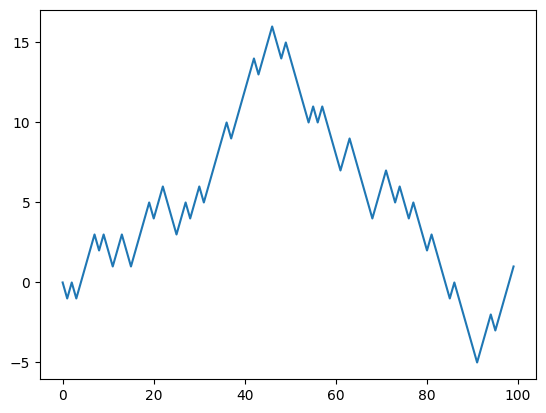

In [51]:
plt.plot(walk[:100])

### 넘파이를 이용한 구현

In [52]:
t_start = time.time()
nsteps = 1000000
rng = np.random.default_rng(seed=12345)

draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()
t_end = time.time()
t_end - t_start

0.019489049911499023

### 간단한 통계

In [53]:
walk.min()

np.int64(-251)

In [54]:
# 시험에 나왔었음
(np.abs(walk) >= 10).argmax()   # argmax() => 가장 큰 원소의 index를 반환

np.int64(155)

In [55]:
walk[155]

np.int64(10)

### 한 번에 많이 시뮬레이션

In [56]:
n_simulations = 5000
nsteps = 1000
# 2차원 numpy 배열
# 0번 axis: simulation 수, 1번 axis: step 수
draws = rng.integers(0, 2, size=(n_simulations, nsteps))
steps = np.where(draws == 0, 1, -1)
# 열 방향으로 누적합
walks = steps.cumsum(axis=1)
walks

array([[  1,   0,  -1, ...,  66,  67,  66],
       [  1,   2,   3, ...,  48,  49,  50],
       [ -1,  -2,  -3, ..., -30, -29, -28],
       ...,
       [ -1,  -2,  -3, ...,  -2,  -1,  -2],
       [  1,   0,  -1, ..., -40, -41, -40],
       [ -1,   0,  -1, ...,   4,   3,   2]])

In [57]:
walks.max()     # 모든 시뮬레이션에 대해 적용

np.int64(120)

In [58]:
walks.max(axis=1)   # 시뮬레이션 별로 적용

array([78, 53,  5, ...,  2, 27, 11])

In [59]:
walks.min()

np.int64(-114)

In [60]:
walks.min(axis=1)

array([ -2,   1, -55, ..., -57, -45, -17])

### 30칸 이상 넘어가는 최소 step 계산

In [61]:
#각 시뮬레이션 별로 step이 30을 넘는지 boolean 값 반환
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([ True,  True,  True, ...,  True,  True, False])

In [62]:
hits30.sum()    # step이 30을 넘는 시뮬레이션의 수

np.int64(3371)

In [63]:
walks[hits30]   # boolean 객체를 이용한 인덱싱싱

array([[  1,   0,  -1, ...,  66,  67,  66],
       [  1,   2,   3, ...,  48,  49,  50],
       [ -1,  -2,  -3, ..., -30, -29, -28],
       ...,
       [  1,   0,   1, ...,  50,  49,  48],
       [ -1,  -2,  -3, ...,  -2,  -1,  -2],
       [  1,   0,  -1, ..., -40, -41, -40]])

In [64]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)   # 30을 넘는 시뮬레이션에 대해서 처음으로 30을 넘는 시뮬레이션의 step 수 저장
crossing_times

array([135, 321, 369, ..., 403, 373, 487])

In [65]:
crossing_times.mean()

np.float64(505.19104123405515)